In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

In [3]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


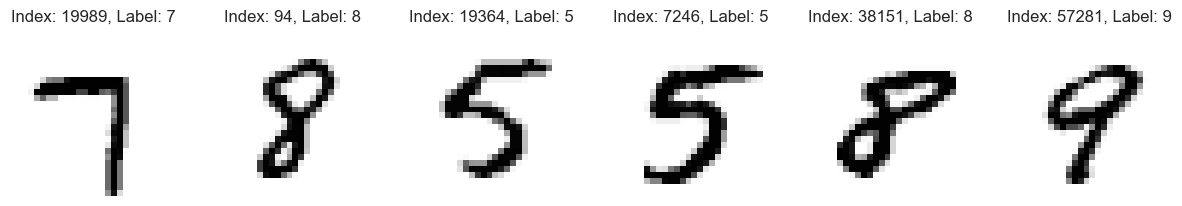

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-white")

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)

In [11]:
print(y_train[0])

4


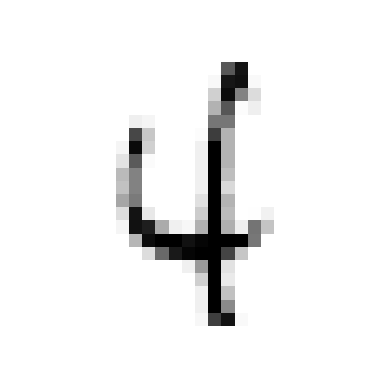

In [12]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [15]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

In [17]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [19]:
class MyModel(models.Model):
  def __init__(self, **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.flat = layers.Flatten()
    self.dense1 = layers.Dense(100, activation='relu')
    self.dense2 = layers.Dense(64, activation='relu')
    self.dense3 = layers.Dense(32, activation='relu')
    self.out = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.flat(inputs)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    x = self.out(x)
    
    return x

In [20]:
model = MyModel()
model.build(input_shape=(None, 28, 28))  # input shape 명시
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  78500     
                                                                 
 dense_1 (Dense)             multiple                  6464      
                                                                 
 dense_2 (Dense)             multiple                  2080      
                                                                 
 dense_3 (Dense)             multiple                  330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 1s 3ms/step - loss: 1.8260 - accuracy: 0.4748 - val_loss: 1.1659 - val_accuracy: 0.6965
Epoch 2/50
329/329 [==============================] - 1s 3ms/step - loss: 0.8203 - accuracy: 0.7761 - val_loss: 0.6215 - val_accuracy: 0.8274
Epoch 3/50
329/329 [==============================] - 1s 3ms/step - loss: 0.5272 - accuracy: 0.8565 - val_loss: 0.4694 - val_accuracy: 0.8684
Epoch 4/50
329/329 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.8837 - val_loss: 0.4021 - val_accuracy: 0.8857
Epoch 5/50
329/329 [==============================] - 1s 2ms/step - loss: 0.3718 - accuracy: 0.8965 - val_loss: 0.3566 - val_accuracy: 0.8982
Epoch 6/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3399 - accuracy: 0.9052 - val_loss: 0.3286 - val_accuracy: 0.9029
Epoch 7/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3164 - accuracy: 0.9115 - val_loss: 0.3155 - val_accuracy: 0.9064
Epoch 

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

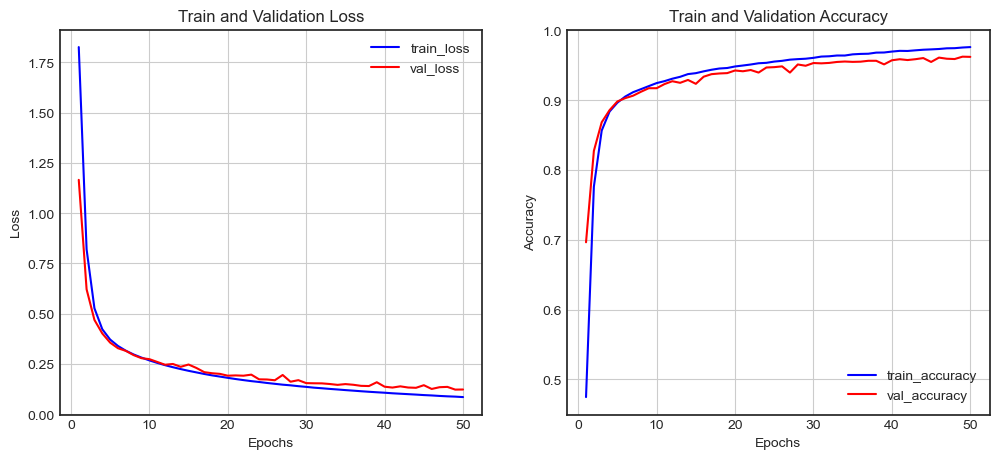

In [31]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [33]:
model.evaluate(x_test, y_test)
# [loss, accuracy] 출력

313/313 [==============================] - 1s 2ms/step - loss: 0.1143 - accuracy: 0.9644


[0.11434613913297653, 0.9643999934196472]

In [34]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

313/313 [==============================] - 0s 915us/step
(10000, 10)
[9.3431108e-06 6.2687474e-07 2.7357874e-04 1.1505370e-03 3.5834610e-06
 4.6519097e-05 4.6997286e-09 9.9818134e-01 8.3710176e-05 2.5083433e-04]


In [39]:
np.argmax(pred_ys[0])

7

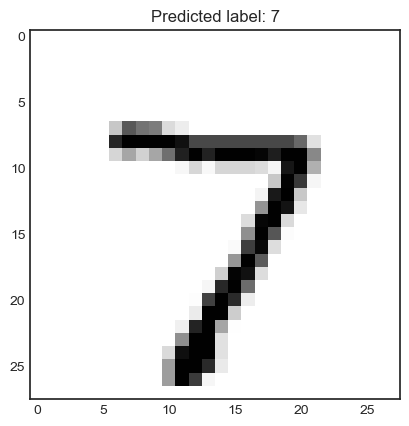

In [40]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

In [41]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.95      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.95      0.97      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



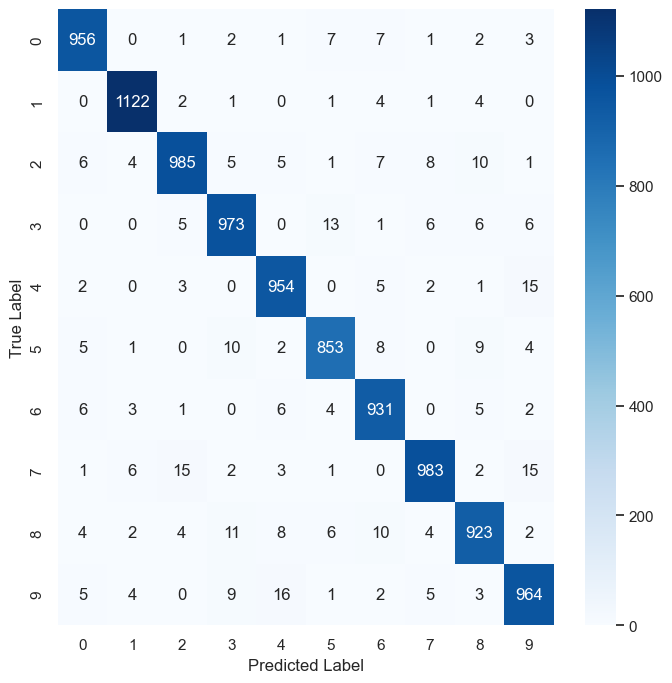

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 모델 저장과 로드

In [48]:
# subclassed 모델을 저장하는법
model.save('mnist_model')  # 디렉터리로 저장됨
# 또는 
# model.save('mnist_model', save_format='tf')

INFO:tensorflow:Assets written to: mnist_model\assets


In [ ]:
# # Functional API 방식일때 모델 저장
# model.save('mnist_model.h5')

In [51]:
# 모델 불러오기
loaded_model = tf.keras.models.load_model('mnist_model/')
loaded_model.summary()

Model: "my_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_8 (Dense)             multiple                  78500     
                                                                 
 dense_9 (Dense)             multiple                  6464      
                                                                 
 dense_10 (Dense)            multiple                  2080      
                                                                 
 dense_11 (Dense)            multiple                  330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [52]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

313/313 [==============================] - 0s 941us/step
(10000, 10)
[9.3431108e-06 6.2687474e-07 2.7357874e-04 1.1505370e-03 3.5834610e-06
 4.6519097e-05 4.6997286e-09 9.9818134e-01 8.3710176e-05 2.5083433e-04]


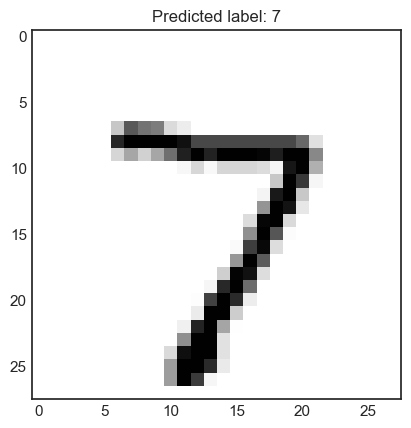

In [55]:
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

plt.style.use("seaborn-v0_8-white")
plt.title(f'Predicted label: {arg_pred_y2[0]}')
plt.imshow(x_test[0])
plt.show()

# 콜백
- ModelCheckpoint
- EarlyStopping
- LearningRateScheduler
- Tensorbord

In [57]:
from tensorflow.keras import callbacks

## ModelCheckpoint

In [58]:
check_point_cb = callbacks.ModelCheckpoint('mnist_model')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0933 - accuracy: 0.9727
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0865 - accuracy: 0.9746
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0805 - accuracy: 0.9764
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0752 - accuracy: 0.9770
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0692 - accuracy: 0.9796
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9809
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0608 - accuracy: 0.9830
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0562 - accuracy: 0.9852
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0528 - accuracy: 0.9853
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.048

In [59]:
check_point_cb = callbacks.ModelCheckpoint('mnist_model', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0466 - accuracy: 0.9869 - val_loss: 0.1136 - val_accuracy: 0.9670
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0433 - accuracy: 0.9881 - val_loss: 0.1026 - val_accuracy: 0.9689
Epoch 3/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0404 - accuracy: 0.9889 - val_loss: 0.1031 - val_accuracy: 0.9698
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0381 - accuracy: 0.9896 - val_loss: 0.1066 - val_accuracy: 0.9695
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0354 - accuracy: 0.9905 - val_loss: 0.1012 - val_accuracy: 0.9705
Epoch 6/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0332 - accuracy: 0.9914 - val_loss: 0.1044 - val_accuracy: 0.9704
Epoch 7/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0309 - accuracy: 0.9920 - val_loss: 0.1123 - val_accuracy:

## EarlyStopping

In [69]:
check_point_cb = callbacks.ModelCheckpoint('mnist_model', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=4, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0038 - accuracy: 0.9999 - val_loss: 0.1205 - val_accuracy: 0.9712
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.1192 - val_accuracy: 0.9716
Epoch 3/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1205 - val_accuracy: 0.9717
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1203 - val_accuracy: 0.9719
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.1210 - val_accuracy: 0.9714
Epoch 6/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.1215 - val_accuracy: 0.9711


## LearningRateScheduler

In [70]:
def scheduler(epoch, learning_rate):
  if epoch < 10:
    return learning_rate
  else:
    return learning_rate * tf.math.exp(-0.1)

In [71]:
round(model.optimizer.lr.numpy(), 5) # sgd의 기본값은 0.01

0.00497

In [72]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00301

## Tensorboard

In [74]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [76]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1338 - val_accuracy: 0.9716
Epoch 2/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1331 - val_accuracy: 0.9718
Epoch 3/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1338 - val_accuracy: 0.9717
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1338 - val_accuracy: 0.9719
Epoch 5/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1341 - val_accuracy: 0.9719
Epoch 6/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 0.9718
Epoch 7/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1341 - val_accuracy: